<a href="https://colab.research.google.com/github/manhinojosa/Viento_Modelos/blob/main/TFM_UCM_HEX_MH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final de Master #
## Master en Big Data y Data Science: Aplicaciones al Comercio, Empresa y Finanzas ##
## Universidad Complutense de Madrid ##

## Título: Integración de celdas H3 para la selección de áreas de factibilidad de proyectos de energía eólica mediante la aplicación de componentes principales y modelo de machine learning random forest. ##
### Autor: Manuel E. Hinojosa ###
#### Fecha: 2 de Marzo de 2023 ####


### 1. Carga de datos ###

La carga de los datos se hace mediante el uso de la libreria Pandas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [62]:
dataset = r'/content/drive/MyDrive/TFM_UCM/DATASET/TFM_HEX_MH.csv'
tfm_hex = pd.read_csv(dataset)

In [ ]:
tfm_hex.head(5)

,OID,Org_id,Max_WSP,Min_WSP,Mean_WSP,Calz_km,Calz_cnt,Calz_dsc,TTE_cnt,LTE_km,...,InEl_km2,VxHx_left,VxHx_top,VxHx_right,VxHx_btm,Cmrca,Mun_nom,Con_kWh_hex,Con_kWh_Mun,Area_Hex
0,1,3,7.570377,3.145082,4.889567,0.0,0,NaN,0,0.0,...,NaN,261025.6058,4515475.523,262180.3063,4514475.523,MONTSIA,La Senia,1.75689,223.12532,866025.4
1,2,4,7.513499,3.203467,4.849657,0.0,0,NaN,0,0.0,...,NaN,261025.6058,4514475.523,262180.3063,4513475.523,MONTSIA,La Senia,1.75689,223.12532,866025.4
2,3,5,7.489709,3.150265,4.868490,0.0,0,NaN,0,0.0,...,NaN,261025.6058,4513475.523,262180.3063,4512475.523,MONTSIA,La Senia,1.75689,223.12532,866025.4
3,4,7,7.512815,3.142868,4.887665,0.0,0,NaN,0,0.0,...,NaN,261891.6312,4514975.523,263046.3317,4513975.523,MONTSIA,La Senia,1.75689,223.12532,866025.4
4,5,8,7.577927,3.231379,4.927116,0.0,0,NaN,0,0.0,...,NaN,261891.6312,4513975.523,263046.3317,4512975.523,MONTSIA,La Senia,1.75689,223.12532,866025.4


#### 1.1 Descripción de Variables ####

* Variable  /  Descripción*

* OID	     :   Identificador automático del hexágono
* Org_id	 :   Identificador adicional del hexágono
* Max_WSP	 :   Velocidad máxima del viento
*Min_WSP	 :   Velocidad mínima del viento
*Mean_WSP :	 Velocidad media del viento
*Calz_km	 :   Largo total de la calzada que se superpone con el hexágono
*Calz_cnt :	 Cantidad total de tramos de calzada que se superponen con el hexágono
*NA_km2	 :   Superficie total de áreas naturales dentro del hexágono
*NA_cnt	 :   Áreas naturales individuales dentro del hexágono
*Na_dsc	 :   Descripción del área natural (bosques, praderas, arboles individuales, llanos, roqueríos)
*TTE_cnt	 :   Torre de alta tensión
*LTE_km	 :   Largo total de las líneas de transmisión eléctrica se superponen con el hexágono
*LTE_cnt	 :   Cantidad total de líneas de transmisión eléctrica que se superponen con el hexágono
*UA_km2	 :   Superficie en kilómetros cuadrados de áreas urbanas o edificadas que están dentro del hexágono
*UA_cnt	 :   Cantidad de polígonos urbanos dentro del hexágono
*Den_P	 :   Densidad de población medidas en hab/km2 del municipio
*Pend_m	 :   Pendiente media que está dentro del hexágono
*InEl_dsc :	 Descripción de las instalaciones eléctricas (Inst_E.OF: Instalación de otras fuentes; E.E: Energía Eléctrica; E.EO: Eólica; E.HE: Hidroeléctrica; E.NU: Nuclear; E.SO: Solar; E.TM: Térmica; E.HC: Hidrocarburos)             
*InEl_km2  :	 Área en km2 de las instalaciones eléctricas
*Calz_dsc  :  Descripción del tipo de calzada
*VxHx_left :  Vértice izquierdo del hexágono
*VxHx_top  :  Vértice superior del hexágono
*VxHx_right:  Vértice derecho del hexágono
*VxHx_btm  :  Vértice inferior del hexágono
*Cmrca	  :  Nombre de la Comarca
*Mun_nom	  :  Nombre del Municipio
*Con_kWh_hex: Consumo en kWh por hexágono
*Con_kWh_Mun: Consumo total en kWh por el municipio
*Area_Hex   : Área en km2 del hexágono

### 2. Transformacion de datos ###

#### 2.1 Columnas categóricas a columnas númericas

Para realizar la siguiente transformacion, se crea una lista llamada "col" que contiene todos los nombres de las columnas del dataframe **tfm_hex**. Una vez hecho esto, seleccionamos las columas categoricas que van a ser procesadas, que en este caso son: **'Calz_dsc'**, **'Na_dsc'**, **'InEl_dsc'**. Por otro lado, eliminaremos las columnas **'Cmrca'**, **'Mun_nom'**, que corresponden a la informacion politico administrativa que no genera aporte a la conversión.

Luego, generamos una iteración sobre dichas columnas, lo que convertira los valores de categóricos en columnas de variables binarias mediante la funcion *pd.get_dummies*.
Finalmente agregamos cada una de estas nuevas columnas a nuestro dataframe mediante la funcion *pd.concat* y eliminamos la columna original de valores categoricos del dataframe **tfm_hex**. 

Finalmente, este codigo busca mediante la transformacion de las columnas categóricas a columnas de variables binarias, obtener los datos de entrada para el modelo de *machine learning* 

In [ ]:
#Transformaciones
col = [x for x in tfm_hex.columns]
columns_to_process = ['Calz_dsc', 'Na_dsc', 'InEl_dsc']
tfm_hex.drop(['Cmrca', 'Mun_nom'], axis=1, inplace=True)
print(col)
for c in columns_to_process:
    print('Working with : ', c, tfm_hex[c].dtype)
    temp_name = f'tfm_hex_{c}'
    temp_name = pd.get_dummies(tfm_hex[c])
    tfm_hex = pd.concat([tfm_hex, temp_name], axis=1).reindex(tfm_hex.index)
    tfm_hex.drop(c, axis=1, inplace=True)

['OID', 'Org_id', 'Max_WSP', 'Min_WSP', 'Mean_WSP', 'Calz_km', 'Calz_cnt', 'Calz_dsc', 'TTE_cnt', 'LTE_km', 'LTE_cnt', 'Na_dsc', 'NA_km2', 'Na_cnt', 'UA_km2', 'UA_cnt', 'Den_P', 'Pend_m', 'InEl_dsc', 'InEl_km2', 'VxHx_left', 'VxHx_top', 'VxHx_right', 'VxHx_btm', 'Cmrca', 'Mun_nom', 'Con_kWh_hex', 'Con_kWh_Mun', 'Area_Hex']
Working with :  Calz_dsc object
Working with :  Na_dsc object
Working with :  InEl_dsc object


In [ ]:
tfm_hex['TTE_cnt'].unique()

array([ 0,  2,  1,  3,  6,  4,  7,  5, 10,  8,  9, 12, 11, 17, 19, 20, 21,
       13, 23, 14, 15, 16, 59, 33, 26, 18])

### 2.2 Analisis exploratorio inicial ###

Como parte del analisis exploratorio de datos, necesitamos conocer la estructura y el contenido del dataframe "tfm_hex", y verificar que los datos se esten cargando y procesando correctamente. Por lo tanto, con cada iteracion por medio del bucle "for" sobre cada elemento de la lista imprimiremos nombre de la columna y su tipo de datos que almacena.

In [ ]:
col = [x for x in tfm_hex.columns]
print(col)
for c in col:
    print(c, ' : ', tfm_hex[c].dtype)

['OID', 'Org_id', 'Max_WSP', 'Min_WSP', 'Mean_WSP', 'Calz_km', 'Calz_cnt', 'TTE_cnt', 'LTE_km', 'LTE_cnt', 'NA_km2', 'Na_cnt', 'UA_km2', 'UA_cnt', 'Den_P', 'Pend_m', 'InEl_km2', 'VxHx_left', 'VxHx_top', 'VxHx_right', 'VxHx_btm', 'Con_kWh_hex', 'Con_kWh_Mun', 'Area_Hex', 'Autopista', 'Ferrocarril_Int_CONV', 'Ferrocarril_estr_vel_conv', 'Ferrocarril_int_AVE', 'Ferrocarril_vel_conv', 'Via calzada unica', 'Via doble calzada', 'Via doble preferente', 'Via unica preferente', 'Arboles aislados', 'Vertedero', 'arenas', 'bosque', 'humedal', 'pradera', 'roquerios', 'Inst_E.E', 'Inst_E.EO', 'Inst_E.HC', 'Inst_E.HE', 'Inst_E.NU', 'Inst_E.OF', 'Inst_E.SO', 'Inst_E.TM']
OID  :  int64
Org_id  :  int64
Max_WSP  :  float64
Min_WSP  :  float64
Mean_WSP  :  float64
Calz_km  :  float64
Calz_cnt  :  int64
TTE_cnt  :  int64
LTE_km  :  float64
LTE_cnt  :  int64
NA_km2  :  float64
Na_cnt  :  int64
UA_km2  :  float64
UA_cnt  :  int64
Den_P  :  int64
Pend_m  :  float64
InEl_km2  :  float64
VxHx_left  :  float64

Una vez obtenido la lista completa de las columnas con su tipo de datos, cargamos nuevamente el dataframe para visualizar el resultado

In [ ]:
tfm_hex

,OID,Org_id,Max_WSP,Min_WSP,Mean_WSP,Calz_km,Calz_cnt,TTE_cnt,LTE_km,LTE_cnt,...,pradera,roquerios,Inst_E.E,Inst_E.EO,Inst_E.HC,Inst_E.HE,Inst_E.NU,Inst_E.OF,Inst_E.SO,Inst_E.TM
0,1,3,7.570377,3.145082,4.889567,0.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,4,7.513499,3.203467,4.849657,0.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,5,7.489709,3.150265,4.868490,0.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,7,7.512815,3.142868,4.887665,0.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,8,7.577927,3.231379,4.927116,0.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37065,37066,37889,7.801652,4.573597,6.071446,0.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
37066,37067,37892,7.720746,4.434027,5.970415,0.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
37067,37068,37895,7.950208,4.594975,6.045334,0.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
37068,37069,37896,8.017551,4.658286,6.054664,0.0,0,0,0.0,0,...,0,1,0,0,0,0,0,0,0,0


### 3. Normalización ###

#### 3.1 Seleccion del modelo de normalizacion ####

La normalización del dataframe *tfm_hex* se hara mediante el uso de *MinMaxScaler* de la libreria *Scikit-learn*. La razón para el uso de *preprocessing.MinMaxScaler()* se debe a que el dataframe cuenta con muchos campos categóricos con valores [0, 1] y este es el modulo que mejor maneja este tipo de datos.

La lista [ ] "col" contiene los nombres de todas las columnas numéricas de "tfm_hex" (es decir, aquellas columnas cuyo tipo de dato es: "float64" o "int64"). También en el mismo código, especificamos algunas columnas que no deben normalizarse.

Creamos un objeto *scaler* donde definimos las caracteristicas del rango de salida, que en este caso debe ser entre (0,1). Hacemos una copia del dataframe en "tfm_hex_norm" y luego normalizamos las columnas que mediante el uso de *scaler.fit_transform*. Esto ajustará el rango de nuestras columnas por medio del objeto scaler que habiamos definido en la segunda linea, esto con el proposito de ajustar el rango de de las columnas en la lista "col" al rango establecido en scaler.

Por ultimo, guardamos los datos normalizados en *normalized_df* y asignamos el nombre de las columnas orginales del dataframe.

In [ ]:
from sklearn import preprocessing
import numpy as np

In [ ]:
col = [x for x in tfm_hex.columns if tfm_hex[x].dtype in ['float64', 'int64'] and x not in ['VxHx_left', 'VxHx_top', 'VxHx_right', 'VxHx_btm', 'OID', 'Org_id', 'Area_Hex']]
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

tfm_hex_norm = tfm_hex
dfn = scaler.fit_transform(tfm_hex_norm[col])
normalized_df = pd.DataFrame(dfn, columns = col)

normalized_df


,Max_WSP,Min_WSP,Mean_WSP,Calz_km,Calz_cnt,TTE_cnt,LTE_km,LTE_cnt,NA_km2,Na_cnt,UA_km2,UA_cnt,Den_P,Pend_m,InEl_km2,Con_kWh_hex,Con_kWh_Mun
0,0.288057,0.289192,0.324866,0.0,0.0,0.0,0.0,0.0,0.661782,0.333333,0.000000,0.0,0.002511,0.457201,NaN,0.000338,0.010390
1,0.278822,0.305923,0.313118,0.0,0.0,0.0,0.0,0.0,0.701793,0.500000,0.000000,0.0,0.002511,0.468407,NaN,0.000338,0.010390
2,0.274959,0.290678,0.318662,0.0,0.0,0.0,0.0,0.0,0.828543,0.166667,0.000000,0.0,0.002511,0.361179,NaN,0.000338,0.010390
3,0.278711,0.288558,0.324306,0.0,0.0,0.0,0.0,0.0,0.657581,0.333333,0.000000,0.0,0.002511,0.199958,NaN,0.000338,0.010390
4,0.289283,0.313922,0.335918,0.0,0.0,0.0,0.0,0.0,0.894986,0.166667,0.000000,0.0,0.002511,0.278201,NaN,0.000338,0.010390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37065,0.325608,0.698552,0.672753,0.0,0.0,0.0,0.0,0.0,0.027000,0.166667,0.000000,0.0,0.005535,0.219391,NaN,0.001168,0.007855
37066,0.312471,0.658556,0.643014,0.0,0.0,0.0,0.0,0.0,0.207841,0.500000,0.555284,1.0,0.005535,0.058322,NaN,0.001168,0.007855
37067,0.349728,0.704678,0.665067,0.0,0.0,0.0,0.0,0.0,0.039438,0.333333,0.002024,1.0,0.005535,0.146978,NaN,0.001168,0.007855
37068,0.360662,0.722821,0.667813,0.0,0.0,0.0,0.0,0.0,0.000051,0.166667,0.001434,1.0,0.005535,0.200221,NaN,0.001168,0.007855


#### 3.2 Eliminación y reemplazo de columnas no normalizadas ####

Ahora procederemos a eliminar del dataframe a a aquellas columnas que no fueron normalizadas y reemplazarlas con sus datos ya normalizados. Para ello, aplicamos el cambio directamente en el dataframe. Luego, con *pd.concat* concatenamos el dataframes *tfm_hex_norm* (que es el dataframe con las valores ya normalizados) sobre el dataframe final que es *normalized_df*. Conseguimos ordenar los indices del dataframe *tfm_hex_norm* a fin de que coincidan con con el dataframe original *tfm_hex*, esto se hace para garantizar que los datos normalizados en ambos dataframes se concatenen correctamente.  


In [ ]:
#let's drop not normalized fields, then add normalized (scaled) version of fields
tfm_hex_norm.drop(col, axis=1, inplace=True)
tfm_hex_norm = pd.concat([tfm_hex_norm, normalized_df], axis=1).reindex(tfm_hex_norm.index)

tfm_hex_norm.describe()

,OID,Org_id,VxHx_left,VxHx_top,VxHx_right,VxHx_btm,Area_Hex,Autopista,Ferrocarril_Int_CONV,Ferrocarril_estr_vel_conv,...,LTE_cnt,NA_km2,Na_cnt,UA_km2,UA_cnt,Den_P,Pend_m,InEl_km2,Con_kWh_hex,Con_kWh_Mun
count,37070.000000,37070.000000,37070.000000,3.707000e+04,37070.000000,3.707000e+04,37070.000000,37070.000000,37070.000000,37070.000000,...,37070.000000,37070.000000,37070.000000,37070.000000,37070.000000,37070.000000,37070.000000,984.000000,37070.000000,37070.000000
mean,18535.500000,18990.618425,376835.886688,4.628837e+06,377990.587227,4.627837e+06,866025.403797,0.025034,0.000998,0.003507,...,0.015675,0.339551,0.289187,0.052513,0.477988,0.012401,0.274757,0.039664,0.004813,0.019348
std,10701.331576,10863.016857,64066.390814,5.352501e+04,64066.390814,5.352501e+04,0.013245,0.156230,0.031578,0.059116,...,0.047654,0.313523,0.135817,0.144473,0.499522,0.061768,0.207569,0.083804,0.056420,0.076977
min,1.000000,3.000000,261025.605800,4.489476e+06,262180.306300,4.488476e+06,866025.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9268.250000,9647.250000,324245.460300,4.590976e+06,325400.160800,4.589976e+06,866025.400000,0.000000,0.000000,0.000000,...,0.000000,0.049881,0.166667,0.000000,0.000000,0.000256,0.081601,0.004252,0.000041,0.000647
50%,18535.500000,18976.500000,366680.705100,4.631976e+06,367835.405600,4.630976e+06,866025.400000,0.000000,0.000000,0.000000,...,0.000000,0.242632,0.333333,0.000000,0.000000,0.000923,0.260311,0.013525,0.000134,0.001809
75%,27802.750000,28377.750000,425570.432500,4.669976e+06,426725.133100,4.668976e+06,866025.400000,0.000000,0.000000,0.000000,...,0.000000,0.605230,0.333333,0.018505,1.000000,0.004203,0.426138,0.046791,0.000768,0.010390
max,37070.000000,37901.000000,525163.354000,4.747976e+06,526318.054500,4.746976e+06,866025.450000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.3 Eliminación y revisión de datos nulos ####

La siguiente línea de código busca determinar cuantos valores nulos *NaN* hay en cada columnas del dataframe, esto lo hace por medio de una interación en la lista *col_norm*. Cada iteración se imprime junto con su tipo de dato. Esta lista se utiliza para revisar cada columna e identificar donde se encuentran dichos valores nulos.   

In [ ]:
# Then we need to check data for NaNs and process it

col_norm = [x for x in tfm_hex_norm.columns]
for c in col_norm:
    print(f'{tfm_hex_norm[c].isnull().sum()} NANs in -> {c} column, column datatype : {tfm_hex_norm[c].dtype}')

0 NANs in -> OID column, column datatype : int64
0 NANs in -> Org_id column, column datatype : int64
0 NANs in -> VxHx_left column, column datatype : float64
0 NANs in -> VxHx_top column, column datatype : float64
0 NANs in -> VxHx_right column, column datatype : float64
0 NANs in -> VxHx_btm column, column datatype : float64
0 NANs in -> Area_Hex column, column datatype : float64
0 NANs in -> Autopista column, column datatype : uint8
0 NANs in -> Ferrocarril_Int_CONV column, column datatype : uint8
0 NANs in -> Ferrocarril_estr_vel_conv column, column datatype : uint8
0 NANs in -> Ferrocarril_int_AVE column, column datatype : uint8
0 NANs in -> Ferrocarril_vel_conv column, column datatype : uint8
0 NANs in -> Via calzada unica column, column datatype : uint8
0 NANs in -> Via doble calzada column, column datatype : uint8
0 NANs in -> Via doble preferente column, column datatype : uint8
0 NANs in -> Via unica preferente column, column datatype : uint8
0 NANs in -> Arboles aislados colum

Como podemos ver en la lista de arriba, los valores nulos corresponden a 36086 y se encuentra en la columna InEl_km2. Entonces, reemplazaremos los valores nulos en dicha columna mediante la función *fillna()*, tal como se muestra con la siguiente línea de código:

In [ ]:
tfm_hex_norm['InEl_km2'] = tfm_hex_norm['InEl_km2'].fillna(0)

Ya encontrados los valores nulos y su reemplazo por el valor cero, la siguiente línea de código crea una lista *col_norm* que incluye todas las columnas del dataframe "tfm_hex_norm" y se comprobará nuevamente si hay valores nulos. Se imprimirá la lista todas las columnas con su respectivo data type y el el total de valores nulos si hubiese.

In [ ]:
col_norm = [x for x in tfm_hex_norm.columns]
for c in col_norm:
    print(f'{tfm_hex_norm[c].isnull().sum()} NANs in -> {c} column, column datatype : {tfm_hex_norm[c].dtype}')

0 NANs in -> OID column, column datatype : int64
0 NANs in -> Org_id column, column datatype : int64
0 NANs in -> VxHx_left column, column datatype : float64
0 NANs in -> VxHx_top column, column datatype : float64
0 NANs in -> VxHx_right column, column datatype : float64
0 NANs in -> VxHx_btm column, column datatype : float64
0 NANs in -> Area_Hex column, column datatype : float64
0 NANs in -> Autopista column, column datatype : uint8
0 NANs in -> Ferrocarril_Int_CONV column, column datatype : uint8
0 NANs in -> Ferrocarril_estr_vel_conv column, column datatype : uint8
0 NANs in -> Ferrocarril_int_AVE column, column datatype : uint8
0 NANs in -> Ferrocarril_vel_conv column, column datatype : uint8
0 NANs in -> Via calzada unica column, column datatype : uint8
0 NANs in -> Via doble calzada column, column datatype : uint8
0 NANs in -> Via doble preferente column, column datatype : uint8
0 NANs in -> Via unica preferente column, column datatype : uint8
0 NANs in -> Arboles aislados colum

### 4. Selección de hexágonos para el modelo de entrenamiento y test ###

Debido que el conjunto de datos contiene información de tipo geoespacial debidamente georeferenciada, es importante considerar las coordenadas de los centroides o punto centro del hexágonos para la visualización de los resultados del modelo en un mapa. Por lo tanto, explicaremos la forma de obtener estos puntos centrales de ellos. También determinaremos el conjunto de datos de entrenamiento y test aplicando para ellos condiciones sobre la columna objetivo, que en este caso es *Inst_E.EO*.

#### 4.1 Cálculo de centroide de los hexágonos ####

Se utilizan dos librerias. La primera de ellas es *shapely* que la utilizamos para trabajar con la geometría de los hexágonos y que nos proporciona metodos de calculo de distancias, interseccíon de lineas y áreas. La siguiente es pyproj que nos permite trabajar con projecciones cartográficas.

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
import shapely
import pyproj

Crearemos dos columnas nuevas, 'Centerpoint_X' y 'Centerpoint_Y'; que son las coordenadas del par ordenado del punto centro del hexágono. Estas las agregaremos al dataframe *tfm_hex_norm*. Estas columnas tiene las coordenadas del centro del hexágono y el calculo se realiza a través del cálculo del valor medio de entre los vértices izquierdo y derecho para el centroide X, en tanto que para la variable Y, se obtiene con el valor medio de las coordenadas superiores e inferiores del hexágono.

In [ ]:
#Centerpoint creation

tfm_hex_norm['Centerpoint_X'] = (tfm_hex_norm['VxHx_right'] + tfm_hex_norm['VxHx_left'])/2
tfm_hex_norm['Centerpoint_Y'] = (tfm_hex_norm['VxHx_top'] + tfm_hex_norm['VxHx_btm'])/2
tfm_hex_norm

,OID,Org_id,VxHx_left,VxHx_top,VxHx_right,VxHx_btm,Area_Hex,Autopista,Ferrocarril_Int_CONV,Ferrocarril_estr_vel_conv,...,Na_cnt,UA_km2,UA_cnt,Den_P,Pend_m,InEl_km2,Con_kWh_hex,Con_kWh_Mun,Centerpoint_X,Centerpoint_Y
0,1,3,261025.6058,4515475.523,262180.3063,4514475.523,866025.4,0,0,0,...,0.333333,0.000000,0.0,0.002511,0.457201,0.0,0.000338,0.010390,261602.95605,4514975.523
1,2,4,261025.6058,4514475.523,262180.3063,4513475.523,866025.4,0,0,0,...,0.500000,0.000000,0.0,0.002511,0.468407,0.0,0.000338,0.010390,261602.95605,4513975.523
2,3,5,261025.6058,4513475.523,262180.3063,4512475.523,866025.4,0,0,0,...,0.166667,0.000000,0.0,0.002511,0.361179,0.0,0.000338,0.010390,261602.95605,4512975.523
3,4,7,261891.6312,4514975.523,263046.3317,4513975.523,866025.4,0,0,0,...,0.333333,0.000000,0.0,0.002511,0.199958,0.0,0.000338,0.010390,262468.98145,4514475.523
4,5,8,261891.6312,4513975.523,263046.3317,4512975.523,866025.4,0,0,0,...,0.166667,0.000000,0.0,0.002511,0.278201,0.0,0.000338,0.010390,262468.98145,4513475.523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37065,37066,37889,523431.3032,4684975.523,524586.0037,4683975.523,866025.4,0,0,0,...,0.166667,0.000000,0.0,0.005535,0.219391,0.0,0.001168,0.007855,524008.65345,4684475.523
37066,37067,37892,523431.3032,4681975.523,524586.0037,4680975.523,866025.4,0,0,0,...,0.500000,0.555284,1.0,0.005535,0.058322,0.0,0.001168,0.007855,524008.65345,4681475.523
37067,37068,37895,524297.3286,4686475.523,525452.0291,4685475.523,866025.4,0,0,0,...,0.333333,0.002024,1.0,0.005535,0.146978,0.0,0.001168,0.007855,524874.67885,4685975.523
37068,37069,37896,524297.3286,4685475.523,525452.0291,4684475.523,866025.4,0,0,0,...,0.166667,0.001434,1.0,0.005535,0.200221,0.0,0.001168,0.007855,524874.67885,4684975.523


#### 4.1 Creación del conjunto de datos de entrenamiento ####

Creamos el objeto "to_train" que será el conjunto de datos de entrenamiento, que se hace a partir de dos subconjuntos que se obtienen de tfm_hex_norm cuya condicionante esta en la columna *"Inst_E.EO"*. El primer subconjunto se hace por medio de la selección de los registros con valores de 1. El segundo se hace sobre los registros con valor 0 y con selección aleatroria muestreal de 2000 registros.

Combinamos ambos subconjuntos utilizando la función *append()*. Este sera el conjunto de datos que se utilizará como el conjunto de datos de entrenamiento para el modelo. 

In [ ]:
to_train = tfm_hex_norm[tfm_hex_norm["Inst_E.EO"] == 1].append(tfm_hex_norm[tfm_hex_norm["Inst_E.EO"] != 1].sample(n = 2000))
to_train

,OID,Org_id,VxHx_left,VxHx_top,VxHx_right,VxHx_btm,Area_Hex,Autopista,Ferrocarril_Int_CONV,Ferrocarril_estr_vel_conv,...,Na_cnt,UA_km2,UA_cnt,Den_P,Pend_m,InEl_km2,Con_kWh_hex,Con_kWh_Mun,Centerpoint_X,Centerpoint_Y
141,142,192,269685.8598,4550475.523,270840.5604,4549475.523,866025.4,0,0,0,...,0.333333,0.00000,0.0,0.000205,0.352595,0.012134,0.000053,0.000635,270263.21010,4549975.523
186,187,246,270551.8852,4550975.523,271706.5858,4549975.523,866025.4,0,0,0,...,0.333333,0.00000,0.0,0.000154,0.274341,0.065272,0.000062,0.002339,271129.23550,4550475.523
187,188,247,270551.8852,4549975.523,271706.5858,4548975.523,866025.4,0,0,0,...,0.333333,0.00000,0.0,0.000205,0.220021,0.120543,0.000053,0.000635,271129.23550,4549475.523
189,190,249,270551.8852,4547975.523,271706.5858,4546975.523,866025.4,0,0,0,...,0.333333,0.00000,0.0,0.000205,0.251170,0.017443,0.000053,0.000635,271129.23550,4547475.523
190,191,250,270551.8852,4546975.523,271706.5858,4545975.523,866025.4,0,0,0,...,0.333333,0.00146,1.0,0.000205,0.307559,0.032212,0.000053,0.000635,271129.23550,4546475.523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9053,9054,9432,323379.4349,4740475.523,324534.1354,4739475.523,866025.4,0,0,0,...,0.166667,0.00000,0.0,0.001281,0.466089,0.000000,0.000243,0.014555,323956.78515,4739975.523
11693,11694,12091,334637.7651,4671975.523,335792.4657,4670975.523,866025.4,0,0,0,...,0.333333,0.00000,0.0,0.000359,0.560612,0.000000,0.000057,0.002301,335215.11540,4671475.523
36440,36441,37177,506976.8205,4681475.523,508131.5210,4680475.523,866025.4,0,0,0,...,0.166667,0.00000,0.0,0.013991,0.000000,0.000000,0.002586,0.029769,507554.17075,4680975.523
26660,26661,27222,416910.1785,4593475.523,418064.8790,4592475.523,866025.4,0,0,0,...,0.500000,0.49027,1.0,0.125820,0.129477,0.000000,0.022017,0.195145,417487.52875,4592975.523


una vez creado el conjunto de datos de entrenamiento, eliminaremos las columnas que no son necesarias y que están identificadas en la lista *columns*.

In [ ]:
columns = ['VxHx_left', 'VxHx_top', 'VxHx_right', 'VxHx_btm', 'OID', 'Org_id', 'Area_Hex', 'Centerpoint_X', 'Centerpoint_Y']
train_data = to_train.drop(columns,  axis=1, inplace=False)
train_data

,Autopista,Ferrocarril_Int_CONV,Ferrocarril_estr_vel_conv,Ferrocarril_int_AVE,Ferrocarril_vel_conv,Via calzada unica,Via doble calzada,Via doble preferente,Via unica preferente,Arboles aislados,...,LTE_cnt,NA_km2,Na_cnt,UA_km2,UA_cnt,Den_P,Pend_m,InEl_km2,Con_kWh_hex,Con_kWh_Mun
141,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.397388,0.333333,0.00000,0.0,0.000205,0.352595,0.012134,0.000053,0.000635
186,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.333722,0.333333,0.00000,0.0,0.000154,0.274341,0.065272,0.000062,0.002339
187,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.285231,0.333333,0.00000,0.0,0.000205,0.220021,0.120543,0.000053,0.000635
189,0,0,0,0,0,1,0,0,0,1,...,0.000000,0.238187,0.333333,0.00000,0.0,0.000205,0.251170,0.017443,0.000053,0.000635
190,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.347449,0.333333,0.00146,1.0,0.000205,0.307559,0.032212,0.000053,0.000635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9053,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.016827,0.166667,0.00000,0.0,0.001281,0.466089,0.000000,0.000243,0.014555
11693,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.514259,0.333333,0.00000,0.0,0.000359,0.560612,0.000000,0.000057,0.002301
36440,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.056561,0.166667,0.00000,0.0,0.013991,0.000000,0.000000,0.002586,0.029769
26660,0,0,0,0,0,0,0,0,0,1,...,0.588235,0.168365,0.500000,0.49027,1.0,0.125820,0.129477,0.000000,0.022017,0.195145


#### 4.1 Creación de variables dependientes e independientes ####

Con *train_test_split() de Scikit-learn* se dividirá el conjunto de datos para entrenamiento y test. Esta división se realiza para entrenar el modelo en los datos de entrenamiento y evaluar el modelo en los datos test y verificar su rendimiento.

Por consiguiente, separaremos los datos en variables de entrada (X) y variable de salida (y). X contiene las variables independientes que se utilizarán para predecir la variable dependiente (y). En este caso, la variable dependiente es *Inst_E.EO*.  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_data.drop(['Inst_E.EO'], axis=1, inplace=False)
y = train_data['Inst_E.EO']

In [ ]:
X

,Autopista,Ferrocarril_Int_CONV,Ferrocarril_estr_vel_conv,Ferrocarril_int_AVE,Ferrocarril_vel_conv,Via calzada unica,Via doble calzada,Via doble preferente,Via unica preferente,Arboles aislados,...,LTE_cnt,NA_km2,Na_cnt,UA_km2,UA_cnt,Den_P,Pend_m,InEl_km2,Con_kWh_hex,Con_kWh_Mun
141,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.397388,0.333333,0.00000,0.0,0.000205,0.352595,0.012134,0.000053,0.000635
186,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.333722,0.333333,0.00000,0.0,0.000154,0.274341,0.065272,0.000062,0.002339
187,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.285231,0.333333,0.00000,0.0,0.000205,0.220021,0.120543,0.000053,0.000635
189,0,0,0,0,0,1,0,0,0,1,...,0.000000,0.238187,0.333333,0.00000,0.0,0.000205,0.251170,0.017443,0.000053,0.000635
190,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.347449,0.333333,0.00146,1.0,0.000205,0.307559,0.032212,0.000053,0.000635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9053,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.016827,0.166667,0.00000,0.0,0.001281,0.466089,0.000000,0.000243,0.014555
11693,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.514259,0.333333,0.00000,0.0,0.000359,0.560612,0.000000,0.000057,0.002301
36440,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.056561,0.166667,0.00000,0.0,0.013991,0.000000,0.000000,0.002586,0.029769
26660,0,0,0,0,0,0,0,0,0,1,...,0.588235,0.168365,0.500000,0.49027,1.0,0.125820,0.129477,0.000000,0.022017,0.195145


ya con los conjuntos de datos de entrenamiento y test; y establecemos un *test_size* de un 25% con un *random_state* de 42.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.columns

Index(['Autopista', 'Ferrocarril_Int_CONV', 'Ferrocarril_estr_vel_conv',
       'Ferrocarril_int_AVE', 'Ferrocarril_vel_conv', 'Via calzada unica',
       'Via doble calzada', 'Via doble preferente', 'Via unica preferente',
       'Arboles aislados', 'Vertedero', 'arenas', 'bosque', 'humedal',
       'pradera', 'roquerios', 'Inst_E.E', 'Inst_E.HC', 'Inst_E.HE',
       'Inst_E.NU', 'Inst_E.OF', 'Inst_E.SO', 'Inst_E.TM', 'Max_WSP',
       'Min_WSP', 'Mean_WSP', 'Calz_km', 'Calz_cnt', 'TTE_cnt', 'LTE_km',
       'LTE_cnt', 'NA_km2', 'Na_cnt', 'UA_km2', 'UA_cnt', 'Den_P', 'Pend_m',
       'InEl_km2', 'Con_kWh_hex', 'Con_kWh_Mun'],
      dtype='object')

### 5. Análisis de Componentes principales (PCA) ###

Con el conjunto de datos de entrenamiento (X_train), procedemos a realizar un análisis de componentes principales (PCA) cuya finalidad es reducir la dimensionalidad de los datos del dataframe. Para ello, utilizaremos la función PCA de la librería *sklearn.decomposition*.

#### 5.1  Determinación del numero de componentes principales ####

Mediante la aplicación de PCA, intentaremos determinar el número de componentes para explicar al menos el 95% de varianza y construiremos un gráfico para visualizar la varianza explicada acumulada (con una línea horizontal que nos indica el umbral del 95%)

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

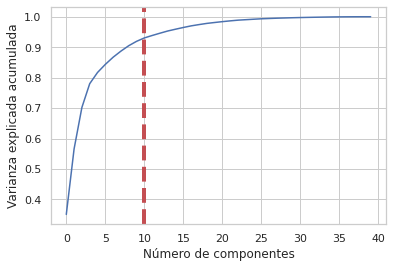

None

,Tasa de Varianza Acumulada,Tasa de Varianza Explicada
0,0.350721,0.350721
1,0.566064,0.215343
2,0.702155,0.136091
3,0.780081,0.077926
4,0.816875,0.036795
5,0.843491,0.026616
6,0.867065,0.023574
7,0.887060,0.019995
8,0.904853,0.017793
9,0.919179,0.014326


In [ ]:
pca_test = PCA(n_components=40)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Tasa de Varianza Acumulada'] = cvr
pca_df['Tasa de Varianza Explicada'] = evr
display(pca_df.head(10))

El modelo de PCA ajustó los datos de entrenamiento donde el gráfico muestra la relación entre el número de componentes principales y la varianza acumulada explicada por esos componentes. Como se aprecia en el grafico, a partir del componente número 10, obtenemos una varianza explicada acumulada del 95%. Eso si, para alcanzar un valor del 100% se alcanza con 25 componentes. La línea vertical de color rojo indica la posición de diez componentes principales.

Por otro lado, la siguiente línea de código, crea un objeto PCA con los 10 componentes principales (n_components=10) obtenidos del primer ánalisis. Se ajustan los datos de entrenamiento (pca.fit(X_train)) y se aplican a ambos conjuntos de datos (pca.transform(X_train) y pca.transform(X_test)). Esto para obtener los nuevos conjuntos de datos con la dimensionalidad reducida.

In [ ]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### 6. Ajuste (*Tuning*) del modelo.

#### 6.1 Optimización de hiperparámetros mediante GridSearchCV ####

Para encontrar los mejores parámetros para el modelo, realizaremos un un proceso de optimización o *tuning*, donde se va a ajustar un modelo de Random Forest Classifier (rfc) utilizando la técnica de validación cruzada y la búsqueda en cuadrícula (GridSearchCV). 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

A continuación definiremos la cuadrícula de posibles valores para los hiperparámetros del modelo:
*(n_estimators, max_depth, min_samples_split, min_samples_leaf)* donde buscaremos evaluar todas las combinaciones posibles y entrenar el modelo con los datos del conjunto de entrenamiento (X_train_pca) que transformamos mediante el análisis de componentes principales. 

En tanto que, *GridSearchCV* buscará entre todas las posibles de las combinaciones los hiperparámetros para *RandomForestClassifier* y nos devolverá el modelo que mejor se ajusta a los datos de entrenamiento (X_train_pca). 

In [ ]:
n_estimators = [50, 100, 200]
max_depth = [3,5,10,15]
min_samples_split = [5,7,10,20]
min_samples_leaf = [5,7,10]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
clf = GridSearchCV(rfc, param_grid, cv = 3)
clf.fit(X_train_pca, y_train)
est = clf.best_estimator_
clf.best_params_

{'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 7,
 'n_estimators': 100}

#### 6.2 Visualización de los valores de los hiperparámetros

A modo de visualizacion, utilizaremos la matriz de precisión media para la combinación de hiperparámetros e identificar los valores de *max_depth y min_samples_split* que producen la precisión media más alta en el modelo.

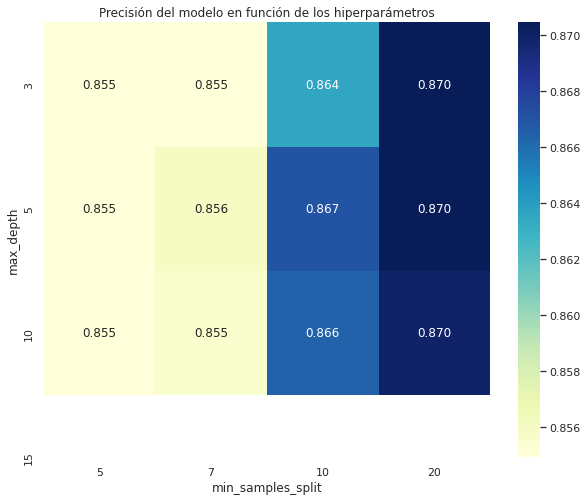

In [ ]:
from sklearn.metrics import accuracy_score

scores = np.zeros((len(n_estimators), len(max_depth), len(min_samples_split), len(min_samples_leaf)))
for i, n in enumerate(n_estimators):
    for j, d in enumerate(max_depth):
        for k, s in enumerate(min_samples_split):
            for l, m in enumerate(min_samples_leaf):
                rfc = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=m)
                rfc.fit(X_train_pca, y_train)
                y_pred = rfc.predict(X_test_pca)
                score = accuracy_score(y_test, y_pred)
                scores[i, j, k, l] = score

# Crear la figura de la matriz de calor
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(np.mean(scores, axis=3)[:,:,1], annot=True, fmt=".3f",
            xticklabels=min_samples_split, yticklabels=max_depth, cmap="YlGnBu", ax=ax)
ax.set_xlabel("min_samples_split")
ax.set_ylabel("max_depth")
plt.title("Precisión del modelo en función de los hiperparámetros")
plt.show()


Según lo anterior, *max_depth* entrega un valor de 10 y *min_samples_split* es un valor de 7, por lo tanto, la precisión media del modelo con la combinación de hiperparámetros en el cuadrante con estos valores es de un 0.857. Esto significa que el modelo tiene en promedio una precisión del 85.7% para los datos de prueba.

### 7. Predicciones y resultados del modelo ###

#### 7.1 Precision del modelo en el cojunto de datos de entrenamiento (X_test_pca)

Esta sección de código está relacionada con la evaluación y uso del modelo para hacer predicciones en datos nuevos. La función accuracy_score de la librería *Scikit-learn*, comparará los valores reales del conjunto *"y_test"* con las predicciones hechas por el modelo *(y_pred)*. El resultado se muestra como un porcentaje de precisiónm que equivale a un 87.74%.

In [ ]:
y_pred = est.predict(X_test_pca)
print(f'Accuracy score: {round(accuracy_score(y_test, y_pred), 4)*100}%')

Accuracy score: 86.7%


En la siguiente linea de código, se preparán los datos para hacer nuevas predicciones con el modelo uya entrenado. 
Para ello, lista col_to_drop tiene los nombres de algunas columnas que se van a eliminar de los datos de entrada, luego filtraremos los datos de entrada *tfm_hex_norm* y eliminar las filas cuyos OID están en la variable *to_train*. 
Para terminar, eliminaremos las columnas de la variable *Org_id* y pero esta se almacenará en la variable results. Ahora bien, se eliminarán las columnas de la lista *col_to_drop* y se almacenaná en la variable *to_predict*. 
Para verificar que todas las columnas inncesarias se han removido, aplicaremos la función print para desplegar los nombres de las columnas en to_predict.

In [ ]:
col_to_drop = ['VxHx_left', 'VxHx_top', 'VxHx_right', 'VxHx_btm', 'OID', 'Org_id', 'Area_Hex', 'Centerpoint_X', 'Centerpoint_Y', 'Inst_E.EO']
data_for_predict = tfm_hex_norm[tfm_hex_norm['OID'].isin(to_train['OID']) == False]
results = data_for_predict.drop('Org_id', 1)
to_predict = data_for_predict.drop(col_to_drop, 1)
to_predict.columns


<ipython-input-37-037ee3435ff0>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  results = data_for_predict.drop('Org_id', 1)
<ipython-input-37-037ee3435ff0>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  to_predict = data_for_predict.drop(col_to_drop, 1)


Index(['Autopista', 'Ferrocarril_Int_CONV', 'Ferrocarril_estr_vel_conv',
       'Ferrocarril_int_AVE', 'Ferrocarril_vel_conv', 'Via calzada unica',
       'Via doble calzada', 'Via doble preferente', 'Via unica preferente',
       'Arboles aislados', 'Vertedero', 'arenas', 'bosque', 'humedal',
       'pradera', 'roquerios', 'Inst_E.E', 'Inst_E.HC', 'Inst_E.HE',
       'Inst_E.NU', 'Inst_E.OF', 'Inst_E.SO', 'Inst_E.TM', 'Max_WSP',
       'Min_WSP', 'Mean_WSP', 'Calz_km', 'Calz_cnt', 'TTE_cnt', 'LTE_km',
       'LTE_cnt', 'NA_km2', 'Na_cnt', 'UA_km2', 'UA_cnt', 'Den_P', 'Pend_m',
       'InEl_km2', 'Con_kWh_hex', 'Con_kWh_Mun'],
      dtype='object')

### 7.2 Predicción y Resultados ###

Para la predicción de resultados, se transforma el mismo conjunto de datos PCA que se uso para entrenar el modelo (X_predict_pca = pca.transform(to_predict)). Al utilizar el modelo entrenado (est) se podrá predecir la variable objetivo (y_predicted = est.predict(X_predict_pca)).

Finalmente, creamos la variable **Prediccion_Eolica** y ésta se agrega al dataFrame **results** que contiene todas las variables de entrada junto con la variable objetivo. La variable ***Prediccion_Eolica***  es la variable objetivo predicha por el modelo para los datos de entrada en to_predict.

In [ ]:
X_predict_pca = pca.transform(to_predict)

In [ ]:
y_predicted = est.predict(X_predict_pca)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
results['Prediccion_Eolica'] = y_predicted

results

,OID,VxHx_left,VxHx_top,VxHx_right,VxHx_btm,Area_Hex,Autopista,Ferrocarril_Int_CONV,Ferrocarril_estr_vel_conv,Ferrocarril_int_AVE,...,UA_km2,UA_cnt,Den_P,Pend_m,InEl_km2,Con_kWh_hex,Con_kWh_Mun,Centerpoint_X,Centerpoint_Y,Prediccion_Eolica
0,1,261025.6058,4515475.523,262180.3063,4514475.523,866025.4,0,0,0,0,...,0.000000,0.0,0.002511,0.457201,0.0,0.000338,0.010390,261602.95605,4514975.523,0
1,2,261025.6058,4514475.523,262180.3063,4513475.523,866025.4,0,0,0,0,...,0.000000,0.0,0.002511,0.468407,0.0,0.000338,0.010390,261602.95605,4513975.523,0
2,3,261025.6058,4513475.523,262180.3063,4512475.523,866025.4,0,0,0,0,...,0.000000,0.0,0.002511,0.361179,0.0,0.000338,0.010390,261602.95605,4512975.523,0
3,4,261891.6312,4514975.523,263046.3317,4513975.523,866025.4,0,0,0,0,...,0.000000,0.0,0.002511,0.199958,0.0,0.000338,0.010390,262468.98145,4514475.523,0
4,5,261891.6312,4513975.523,263046.3317,4512975.523,866025.4,0,0,0,0,...,0.000000,0.0,0.002511,0.278201,0.0,0.000338,0.010390,262468.98145,4513475.523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,37065,523431.3032,4685975.523,524586.0037,4684975.523,866025.4,0,0,0,0,...,0.000000,0.0,0.005535,0.227941,0.0,0.001168,0.007855,524008.65345,4685475.523,0
37065,37066,523431.3032,4684975.523,524586.0037,4683975.523,866025.4,0,0,0,0,...,0.000000,0.0,0.005535,0.219391,0.0,0.001168,0.007855,524008.65345,4684475.523,0
37066,37067,523431.3032,4681975.523,524586.0037,4680975.523,866025.4,0,0,0,0,...,0.555284,1.0,0.005535,0.058322,0.0,0.001168,0.007855,524008.65345,4681475.523,0
37067,37068,524297.3286,4686475.523,525452.0291,4685475.523,866025.4,0,0,0,0,...,0.002024,1.0,0.005535,0.146978,0.0,0.001168,0.007855,524874.67885,4685975.523,0


Ya con los datos de predicción en guardados en un dataframe, procedemos a exportar un nuevo conjunto de datos que tiene las coordenadas de los lugares que son factibles para el emplazamiento de parques eólicos en la comunidad autonoma de Cataluña.

In [ ]:
rslts = results[results["Prediccion_Eolica"] == 1]
rslts.to_csv(r"/content/drive/MyDrive/TFM_UCM/RESULTADOS/results_TFM_XY.csv")

In [ ]:
rslts

,OID,VxHx_left,VxHx_top,VxHx_right,VxHx_btm,Area_Hex,Autopista,Ferrocarril_Int_CONV,Ferrocarril_estr_vel_conv,Ferrocarril_int_AVE,...,UA_km2,UA_cnt,Den_P,Pend_m,InEl_km2,Con_kWh_hex,Con_kWh_Mun,Centerpoint_X,Centerpoint_Y,Prediccion_Eolica
13,14,264489.7074,4554475.523,265644.4080,4553475.523,866025.4,0,0,0,0,...,0.0,0.0,0.000154,0.136810,0.0,0.000062,0.002339,265067.05770,4553975.523,1
15,16,264489.7074,4552475.523,265644.4080,4551475.523,866025.4,0,0,0,0,...,0.0,0.0,0.000154,0.178728,0.0,0.000062,0.002339,265067.05770,4551975.523,1
21,22,265355.7328,4555975.523,266510.4334,4554975.523,866025.4,0,0,0,0,...,0.0,0.0,0.000154,0.074103,0.0,0.000062,0.002339,265933.08310,4555475.523,1
24,25,265355.7328,4552975.523,266510.4334,4551975.523,866025.4,0,0,0,0,...,0.0,0.0,0.000154,0.180500,0.0,0.000062,0.002339,265933.08310,4552475.523,1
31,32,266221.7582,4557475.523,267376.4588,4556475.523,866025.4,0,0,0,0,...,0.0,0.0,0.000154,0.169859,0.0,0.000062,0.002339,266799.10850,4556975.523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27934,27935,426436.4579,4648975.523,427591.1585,4647975.523,866025.4,0,0,0,0,...,0.0,0.0,0.002101,0.175403,0.0,0.001593,0.013002,427013.80820,4648475.523,1
29171,29172,435096.7120,4595975.523,436251.4125,4594975.523,866025.4,0,0,0,0,...,0.0,0.0,0.035107,0.172962,0.0,0.004669,0.016789,435674.06225,4595475.523,1
30109,30110,442890.9406,4634475.523,444045.6411,4633475.523,866025.4,0,0,0,0,...,0.0,0.0,0.006253,0.218379,0.0,0.002527,0.021218,443468.29085,4633975.523,1
32788,32789,468005.6773,4631975.523,469160.3778,4630975.523,866025.4,0,0,0,0,...,0.0,0.0,0.002460,0.402025,0.0,0.001438,0.019333,468583.02755,4631475.523,1


### 8. Productivización ###

#### 8.1 Despliege de resultados en un mapa ####

Con la finalidad de desplegar el resultado del modelo de manera visual en un mapa, utilizamos la libreria GeoPandas que permite la integración de información georeferenciada en python. Para ello, debemos utilizar coberturas en formato *shp* de ESRI. Una vez cargadas las coberturas, procedemos a generar las líneas de código que desplieguen la información de referencia. Las coberturas que se utilizan son:

1. **Catalunya_munis.shp**: Polígono de la división administrativa de la comunidad de cataluña. Cada area representa un municipio
2. **Catalunya_pland_eol.shp**: Se de puntos cuyas coordenadas indican donde se planea construir un parque eólico. Cabe destacar que esta información no fue incorporada al modelo, debido a que todas estan en tramitación ambiental.
3. **Catalunya_eol_now.shp**: Polígono que muestra las áreas donde existen parques eólicos dentro de la comunidad de Cataluña. La existencia de esta informacion esta contenida en la columna 'Inst_E.EO'.
4. **Eolica_model_result.shp** : Cobertura de puntos que muestra el resultado del modelo analizado. Estos son los lugares que el modelo predíjo y donde los hexagonos cuentan con un factibilidad sobre un 85%.

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
# Crear una columna nueva con los datos de coordenadas en formato POINT
geometry = [Point(xy) for xy in zip(rslts.Centerpoint_X, rslts.Centerpoint_Y)]

In [ ]:
# Crear un objeto GeoDataFrame con la columna de geometría
gdf = gpd.GeoDataFrame(rslts, geometry=geometry)

In [ ]:
# Eliminar las columnas de Centerpoint_X y Centerpoint_Y si no las necesitas más
gdf.drop(['Centerpoint_X', 'Centerpoint_Y'], axis=1, inplace=True)

In [ ]:
# Ver las primeras filas del GeoDataFrame resultante
print(gdf.head())

    OID    VxHx_left     VxHx_top   VxHx_right     VxHx_btm  Area_Hex  \
13   14  264489.7074  4554475.523  265644.4080  4553475.523  866025.4   
15   16  264489.7074  4552475.523  265644.4080  4551475.523  866025.4   
21   22  265355.7328  4555975.523  266510.4334  4554975.523  866025.4   
24   25  265355.7328  4552975.523  266510.4334  4551975.523  866025.4   
31   32  266221.7582  4557475.523  267376.4588  4556475.523  866025.4   

    Autopista  Ferrocarril_Int_CONV  Ferrocarril_estr_vel_conv  \
13          0                     0                          0   
15          0                     0                          0   
21          0                     0                          0   
24          0                     0                          0   
31          0                     0                          0   

    Ferrocarril_int_AVE  ...    Na_cnt  UA_km2  UA_cnt     Den_P    Pend_m  \
13                    0  ...  0.333333     0.0     0.0  0.000154  0.136810   
15      

<AxesSubplot:>

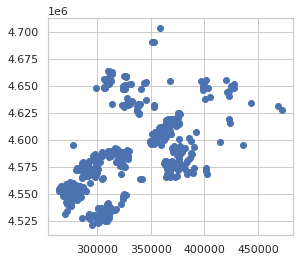

In [ ]:
gdf.plot()

<AxesSubplot:>

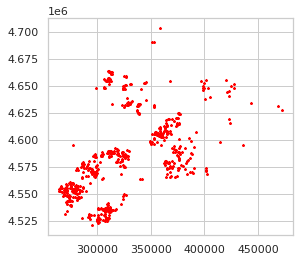

In [ ]:
gdf.plot(marker='*', color='red', markersize=5)

Las coberturas que estamos desplegando son:

Comunidad de catalunya, límites administrativos a nivel de comarcas y municipios 
Localización de parques eolicos en etapa de tramitacion ambiental
Localización de los actuales parques eólicos en la comunidad
Coordenadas de los centroides de los hexagonos que se obtuvieron en los procesos anteriores.
    

In [ ]:
#Importar shapefile #Nota: El Sistema de projeccion oficial para Catalunya es ETRS 1989 ETRS-TM31, codigo 3043 de ESRI
shp_comarc = gpd.read_file(r'/content/drive/MyDrive/TFM_UCM/TFM_SHP/Catalunya_admin_Comarcas.shp') #Poly
#shp_muni = gpd.read_file(r'/content/drive/MyDrive/TFM_UCM/TFM_SHP/Catalunya_admin_Municipios.shp') #Poly
shp_plnd = gpd.read_file(r'/content/drive/MyDrive/TFM_UCM/TFM_SHP/Catalunya_Parcs_Planned.shp') #Point
shp_parcs = gpd.read_file(r'/content/drive/MyDrive/TFM_UCM/TFM_SHP/Catalunya_Parcs_Actuales.shp') #Poly
shp_rslt = gpd.read_file(r'/content/drive/MyDrive/TFM_UCM/TFM_SHP/Catalunya_Resultado_Modelo.shp') #Point

<AxesSubplot:>

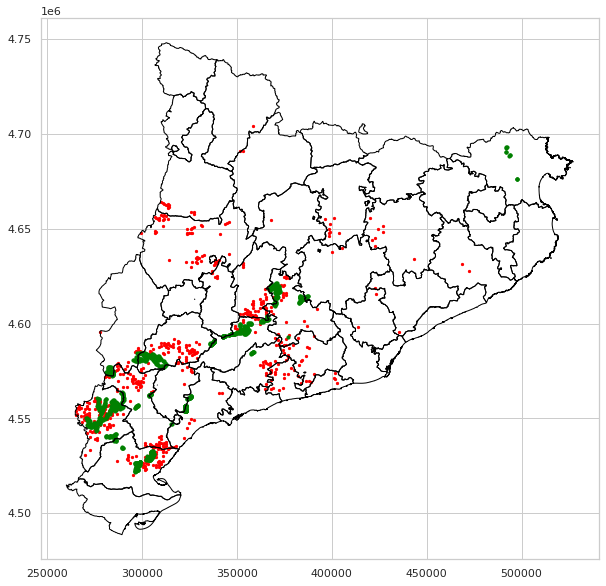

In [ ]:
# Creacion de un cuadrante de fondo y un eje para el mapa
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax,marker='o', color='red', markersize=5)
shp_parcs.plot(ax=ax, facecolor='blue', edgecolor='black')
#shp_rslt.plot(ax=ax, marker='o', color='red', markersize=5)
shp_plnd.plot(ax=ax, marker='o', color='green', markersize=10)
#shp_muni.plot(ax=ax, facecolor='lightyellow', edgecolor='grey')
shp_comarc.plot(ax=ax, facecolor='none', edgecolor='black')


**8.2 Resultados**

El modelo presenta un "accuracy" de un 88.08%, y eso se comprueba al desplegar los resultados en el mapa, puesto que al integrar dichos resultados en su extensión geoespacial, las coordenadas de estos registros coinciden con la ubicación de futuros proyectos que estan en tramitación ambiental por parte de la generalita de catalunya, es importante señalar que dicha información no fui incluida en el conjunto de datos del modelo ni tampoco se incluyeron en ningún proceso previo. Por lo tanto, el visualizar que dichos proyectos en estado de tramitación, cuya area fue seleccionada mediante métodos tradicionales (segun lo descrito por las DIA de los proyectos: Medición en terreno, campañas y rastreo de datos) coinciden con los hexágonos que fueron entrenados, confirma que la predicción hecha por el modelo escogido tiene una alta exactitud.